In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-global-forecasting-week-2/submission.csv
/kaggle/input/covid19-global-forecasting-week-2/train.csv
/kaggle/input/covid19-global-forecasting-week-2/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score


In [3]:
train=pd.read_csv('/kaggle/input/covid19-global-forecasting-week-2/train.csv')
test=pd.read_csv('/kaggle/input/covid19-global-forecasting-week-2/test.csv')

In [4]:
train.head() #Display the top five rows of the datasets

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [5]:
train.describe() #Display descriptive statistics

,Id,ConfirmedCases,Fatalities
count,20580.000000,20580.000000,20580.000000
mean,14685.500000,514.939116,21.080952
std,8487.230117,4541.261768,287.758197
min,1.000000,0.000000,0.000000
25%,7335.750000,0.000000,0.000000
50%,14685.500000,0.000000,0.000000
75%,22035.250000,35.000000,0.000000
max,29370.000000,105792.000000,12428.000000


In [6]:
test.head() #Display the top five rows of the datasets

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-03-19
1,2,NaN,Afghanistan,2020-03-20
2,3,NaN,Afghanistan,2020-03-21
3,4,NaN,Afghanistan,2020-03-22
4,5,NaN,Afghanistan,2020-03-23


In [7]:
train['Date']=pd.to_datetime(train['Date'])#convert to datetime
test['Date']=pd.to_datetime(test['Date'])
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [8]:
train.isnull().sum()#checking any null values in the dataset

Id                    0
Province_State    11830
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [9]:
test.isnull().sum()

ForecastId           0
Province_State    7267
Country_Region       0
Date                 0
dtype: int64

In [10]:
train['Province_State'].fillna("None", inplace=True) #filling missing values
test['Province_State'].fillna("None", inplace=True)

In [11]:
U_Country=list(train['Country_Region'].unique())#find the list of unique countries 
U_Country

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary'

In [12]:
U_ProvinceState=list(train['Province_State'].unique()) #find the list of unique Province_state
U_ProvinceState


['None',
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Nova Scotia',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Saskatchewan',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Martinique',
 'Mayotte',
 'New Caledonia',
 'Reunion',
 'Saint Barthelemy',
 'St Martin',
 'Aruba',
 'Curacao',
 'Sint Maarten',
 'Alabama',
 'Alaska',
 'Arizona',
 'Arkans

In [13]:
train['Country_Region'].value_counts()#counts of unique values

US            3780
China         2310
France         700
Canada         700
Australia      560
              ... 
Niger           70
Mauritania      70
Croatia         70
Namibia         70
Pakistan        70
Name: Country_Region, Length: 173, dtype: int64

In [14]:
train1=train.drop(columns=['Id'])#dropping the columns ID 
#groupby refers to process involving splitting(the data into groups based on criteria mentioned by the users),applying function to each group such as mean,count,max and combine the result.
Confirmed_Fatalities_World=train1.groupby(['Date','Country_Region','Province_State']).agg({'ConfirmedCases':['sum'],'Fatalities':['sum']})
Confirmed_Fatalities_World

ConfirmedCases Fatalities
                                                    sum        sum
Date       Country_Region Province_State                          
2020-01-22 Afghanistan    None                      0.0        0.0
           Albania        None                      0.0        0.0
           Algeria        None                      0.0        0.0
           Andorra        None                      0.0        0.0
           Angola         None                      0.0        0.0
...                                                 ...        ...
2020-03-31 Uzbekistan     None                    172.0        2.0
           Venezuela      None                    135.0        3.0
           Vietnam        None                    212.0        0.0
           Zambia         None                     35.0        0.0
           Zimbabwe       None                      8.0        1.0

[20580 rows x 2 columns]

In [15]:
print(train[train.ConfirmedCases == train.ConfirmedCases.max()])

         Id Province_State Country_Region       Date  ConfirmedCases  \
9869  14070           None          Italy 2020-03-31        105792.0   

      Fatalities  
9869     12428.0  


In [16]:
print(train[train.ConfirmedCases == train.ConfirmedCases.min()])

          Id Province_State Country_Region       Date  ConfirmedCases  \
0          1           None    Afghanistan 2020-01-22             0.0   
1          2           None    Afghanistan 2020-01-23             0.0   
2          3           None    Afghanistan 2020-01-24             0.0   
3          4           None    Afghanistan 2020-01-25             0.0   
4          5           None    Afghanistan 2020-01-26             0.0   
...      ...            ...            ...        ...             ...   
20563  29354           None       Zimbabwe 2020-03-15             0.0   
20564  29355           None       Zimbabwe 2020-03-16             0.0   
20565  29356           None       Zimbabwe 2020-03-17             0.0   
20566  29357           None       Zimbabwe 2020-03-18             0.0   
20567  29358           None       Zimbabwe 2020-03-19             0.0   

       Fatalities  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...

In [17]:
train_top10 = train.groupby(['Country_Region','Province_State','Date'])['ConfirmedCases'].sum() \
                          .groupby(['Country_Region','Province_State']).max().sort_values() \
                          .groupby(['Country_Region']).sum().sort_values(ascending = False)

top10_affected_Countries = pd.DataFrame(train_top10).head(10)
top10_affected_Countries

,ConfirmedCases
Country_Region,
US,188018.0
Italy,105792.0
Spain,95923.0
China,82280.0
Germany,71808.0
France,52827.0
Iran,44605.0
United Kingdom,25471.0
Switzerland,16605.0


US has highest number of Confirmed Cases followed by Italy ,China, Spain...

In [18]:
train_top10 = train.groupby(['Country_Region','Province_State','Date'])['Fatalities'].sum() \
                          .groupby(['Country_Region','Province_State']).max().sort_values() \
                          .groupby(['Country_Region']).sum().sort_values(ascending = False)

top10_Fatalities_Countries = pd.DataFrame(train_top10).head(10)
top10_Fatalities_Countries

,Fatalities
Country_Region,
Italy,12428.0
Spain,8464.0
US,3871.0
France,3532.0
China,3309.0
Iran,2898.0
United Kingdom,1793.0
Netherlands,1040.0
Germany,775.0


Eventhough the confirmed Case is higher in US ,fatality is smaller in comparison to Italy ,China,Spain.

****Visualization of the Dataset

Text(0, 0.5, 'Number of Confirmed Cases')

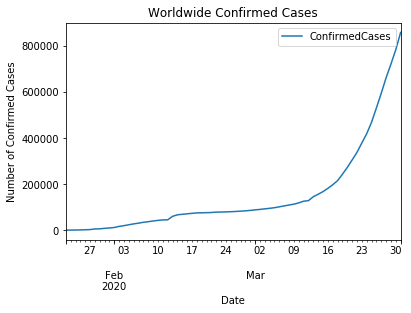

In [19]:
ConfirmedCases_World=train1.groupby(['Date']).agg({'ConfirmedCases':'sum'})
ConfirmedCases_World.plot(title = 'Worldwide Confirmed Cases')
plt.ylabel("Number of Confirmed Cases")

From the above graph we observed that over the time Corona Confirmed Cases increased all over the world.

Text(0, 0.5, 'Number of Fatalities')

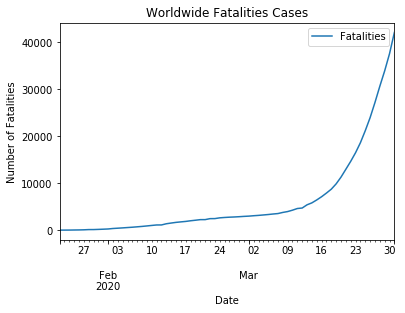

In [20]:
Fatalities_World=train1.groupby(['Date']).agg({'Fatalities':'sum'})
Fatalities_World.plot(title = 'Worldwide Fatalities Cases')
plt.ylabel("Number of Fatalities")

From the above graph we observe that over the time fatalities also increased due to CoronaVirus.

Text(0.5, 1.0, 'Country/Region wise Confirmed Cases')

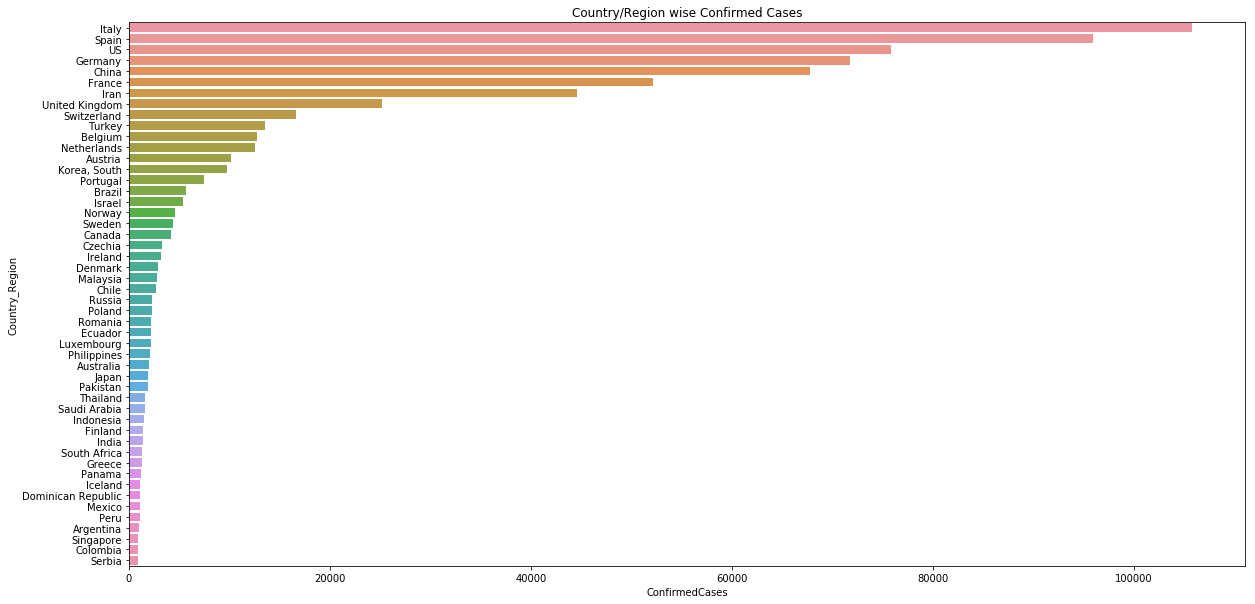

In [21]:
Confirmed_Fatalities_World = train.groupby('Country_Region')[['ConfirmedCases','Fatalities']].max().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x='ConfirmedCases',y='Country_Region',data=Confirmed_Fatalities_World[Confirmed_Fatalities_World['ConfirmedCases'] !=0].sort_values(by='ConfirmedCases',ascending=False).head(50))
plt.title("Country/Region wise Confirmed Cases")

From the above graph we observed that number of confirmedCases in Italy is highest followed by spain ,china.

Text(0.5, 1.0, 'Country/Region wises Fatalities')

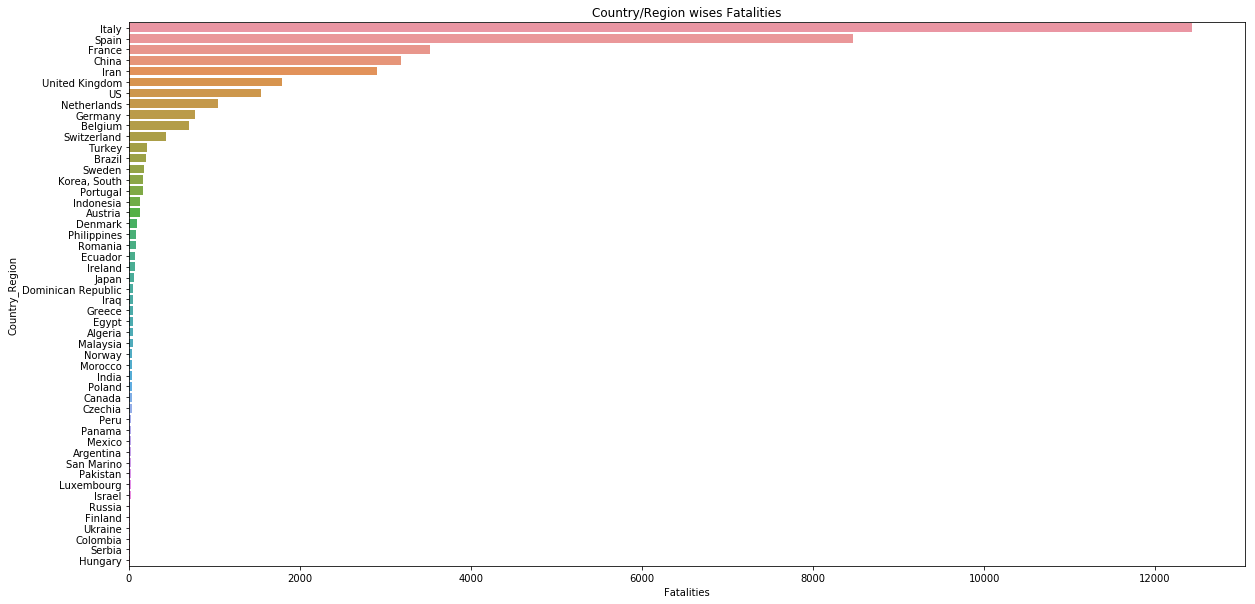

In [22]:
Confirmed_Fatalities_World = train.groupby('Country_Region')[['ConfirmedCases','Fatalities']].max().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x='Fatalities',y='Country_Region',data=Confirmed_Fatalities_World[Confirmed_Fatalities_World['Fatalities'] != 0].sort_values(by='Fatalities',ascending=False).head(50))
plt.title("Country/Region wises Fatalities")

From the graph we observed that rate of fatality in Itlay is highest followed few other country/Region like china,spain...

****Confirmed Cases and fatalities in India

In [23]:
train_India=train.loc[train['Country_Region']=='India']
train1_IN=train_India.drop(columns=['Id','Province_State'])#dropping the columns ID and Province_State
Confirmed_Fatalities_India=train1_IN.groupby(['Date']).agg({'ConfirmedCases':['sum'],'Fatalities':['sum']})
Confirmed_Fatalities_India

,ConfirmedCases,Fatalities
,sum,sum
Date,,
2020-01-22,0.0,0.0
2020-01-23,0.0,0.0
2020-01-24,0.0,0.0
2020-01-25,0.0,0.0
2020-01-26,0.0,0.0
...,...,...
2020-03-27,887.0,20.0
2020-03-28,987.0,24.0


The first case of the corona in India was reported on 30 jan

Text(0, 0.5, 'Number of Confirmed Cases')

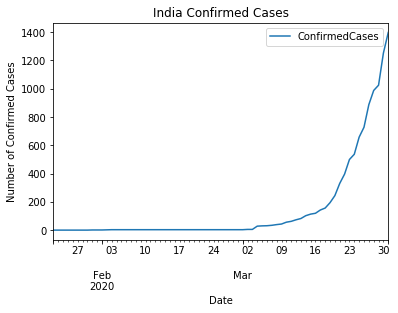

In [24]:
Confirmed_IN=train_India.groupby(['Date']).agg({'ConfirmedCases':'sum'})
Confirmed_IN.plot(title = 'India Confirmed Cases')
plt.ylabel("Number of Confirmed Cases")

from the above graph we observed that with in short period of time virus has spread more in India 

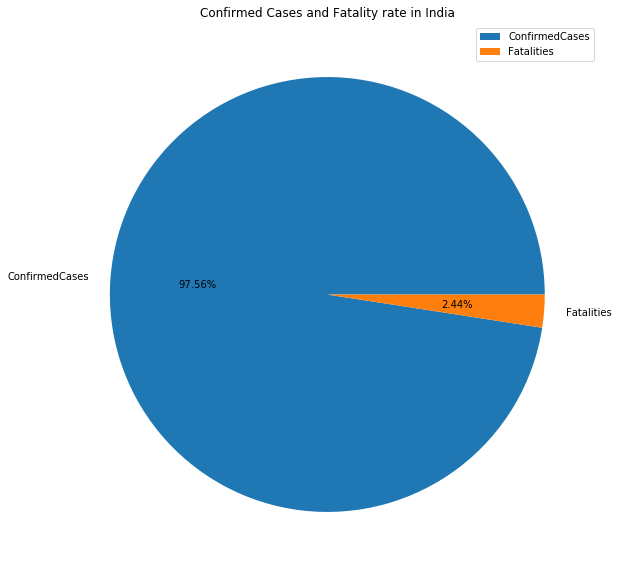

In [25]:
Total_Confirmed_Fatalities_India=train1_IN.groupby(['Country_Region']).agg({'ConfirmedCases':'max','Fatalities':'max'})
T_C_IN=Total_Confirmed_Fatalities_India.iloc[0,0:2]
plt.figure(figsize=(10,10))
plt.pie(T_C_IN,labels=["ConfirmedCases","Fatalities"],autopct='%1.2f%%')
plt.title("Confirmed Cases and Fatality rate in India")
plt.legend(loc="upper right")

From the graph we observed that the fatality rate  of India is 2.3%.

****Cases and Fatalities where coronavirus initially identified : China


In [26]:
train_China=train.loc[train['Country_Region']=='China']
train1_China=train_China.drop(columns=['Id'])#dropping the columns ID
Confirmed_Fatalities_China=train1_China.groupby(['Date','Province_State']).agg({'ConfirmedCases':['sum'],'Fatalities':['sum']})
Confirmed_Fatalities_China

ConfirmedCases Fatalities
                                     sum        sum
Date       Province_State                          
2020-01-22 Anhui                     1.0        0.0
           Beijing                  14.0        0.0
           Chongqing                 6.0        0.0
           Fujian                    1.0        0.0
           Gansu                     0.0        0.0
...                                  ...        ...
2020-03-31 Tianjin                 174.0        3.0
           Tibet                     1.0        0.0
           Xinjiang                 76.0        3.0
           Yunnan                  182.0        2.0
           Zhejiang               1257.0        1.0

[2310 rows x 2 columns]

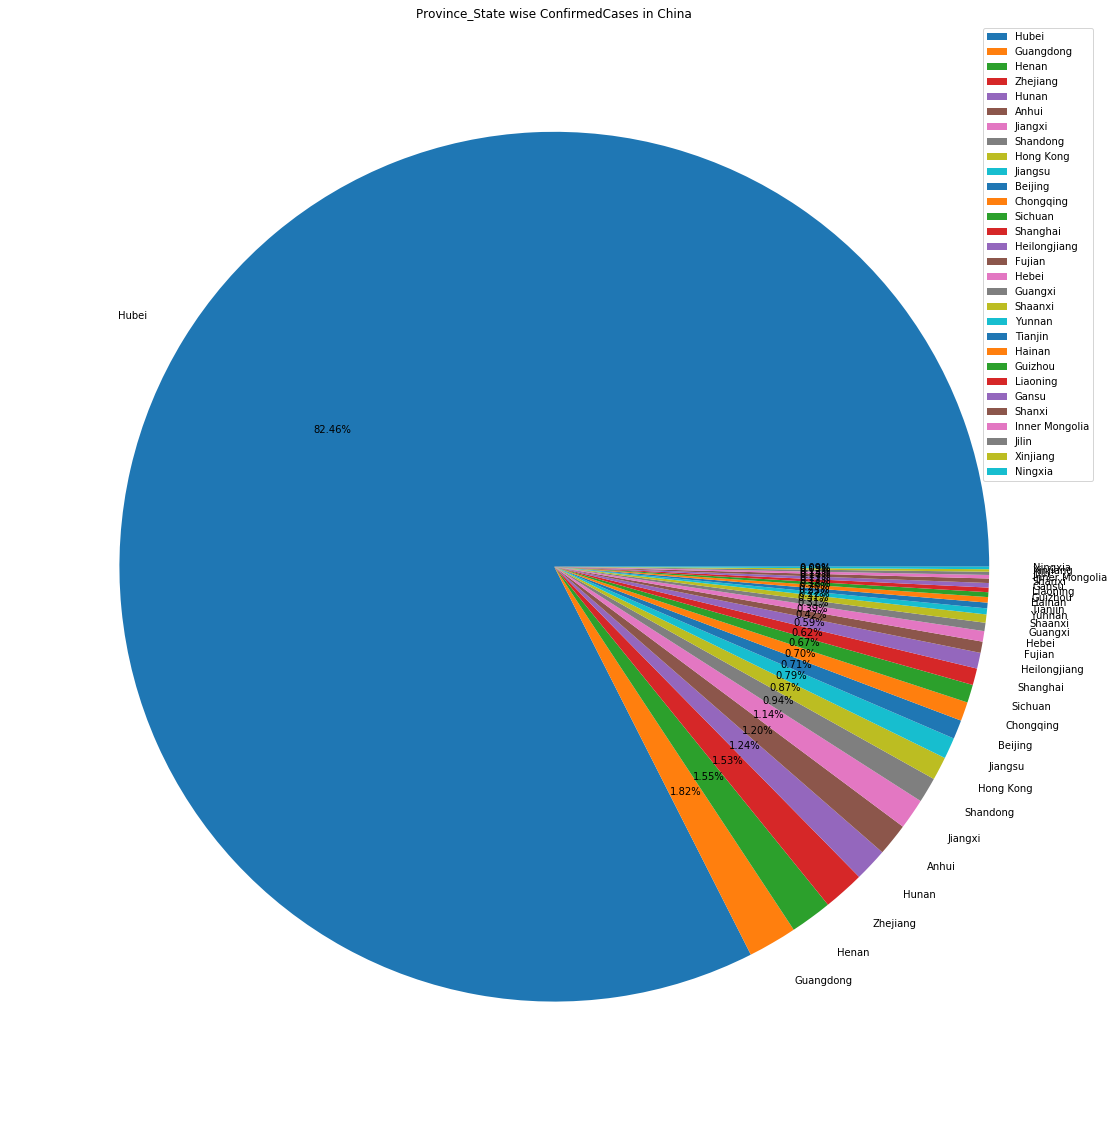

In [27]:
Confirmed_Fatalities = train_China.groupby('Province_State')[['ConfirmedCases','Fatalities']].max().reset_index()
plt.figure(figsize=(20,20))
plt.legend(train_China.Province_State,loc="center left")
plt.pie('ConfirmedCases',data=Confirmed_Fatalities[Confirmed_Fatalities['ConfirmedCases'] != 0].sort_values('ConfirmedCases',ascending=False).head(30),autopct='%1.2f%%',labels='Province_State')
plt.title("Province_State wise ConfirmedCases in China")
plt.legend(loc="best")
plt.show()

from the above graph we observed that the number of confirmed cases in Hubei is highest amongst other province.

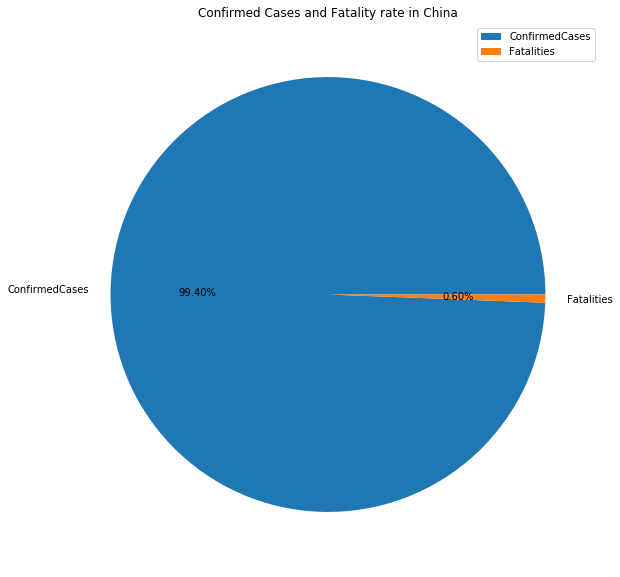

In [28]:
Total_Confirmed_Fatalities_China=train1_China.groupby(['Province_State']).agg({'ConfirmedCases':'max','Fatalities':'max'})
T_C_C=Total_Confirmed_Fatalities_China.iloc[0,0:2]
plt.figure(figsize=(10,10))
plt.pie(T_C_C,labels=["ConfirmedCases","Fatalities"],autopct='%1.2f%%')
plt.title("Confirmed Cases and Fatality rate in China")
plt.legend(loc="upper right")

from the above graph we observed that fatality rate of China is 0.60%

****Confirmed cases and Fatalities in Italy

In [29]:
train_Italy=train.loc[train['Country_Region']=='Italy']
train1_Italy=train_Italy.drop(columns=['Id','Province_State'])#dropping the columns ID
Confirmed_Fatalities_Italy=train1_Italy.groupby(['Date']).agg({'ConfirmedCases':['sum'],'Fatalities':['sum']})
Confirmed_Fatalities_Italy


,ConfirmedCases,Fatalities
,sum,sum
Date,,
2020-01-22,0.0,0.0
2020-01-23,0.0,0.0
2020-01-24,0.0,0.0
2020-01-25,0.0,0.0
2020-01-26,0.0,0.0
...,...,...
2020-03-27,86498.0,9134.0
2020-03-28,92472.0,10023.0


Text(0, 0.5, 'Number of Confirmed Cases')

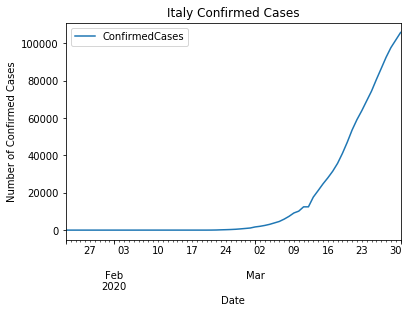

In [30]:
Confirmed_Italy=train_Italy.groupby(['Date']).agg({'ConfirmedCases':'sum'})
Confirmed_Italy.plot(title = 'Italy Confirmed Cases')
plt.ylabel("Number of Confirmed Cases")

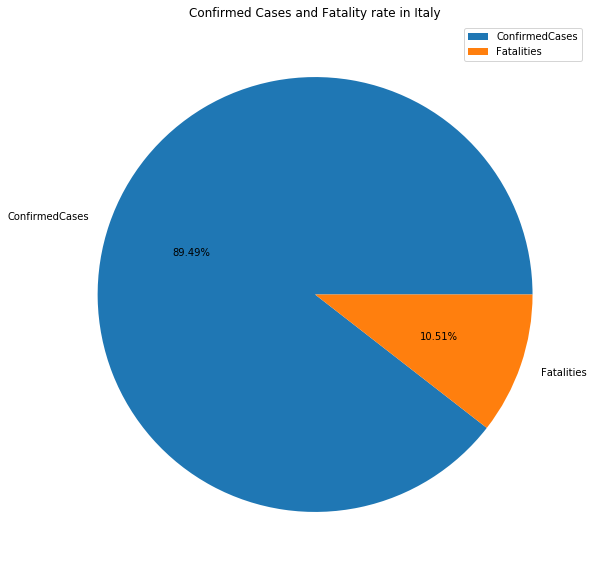

In [31]:
Total_Confirmed_Fatalities_Italy=train1_Italy.groupby(['Country_Region']).agg({'ConfirmedCases':'max','Fatalities':'max'})
T_C_I=Total_Confirmed_Fatalities_Italy.iloc[0,0:2]
plt.figure(figsize=(10,10))
plt.pie(T_C_I,labels=["ConfirmedCases","Fatalities"],autopct='%1.2f%%')
plt.title("Confirmed Cases and Fatality rate in Italy")
plt.legend(loc="upper right")

From the above graph we observed that the fatality rate of Italy is 10.51% 

****Confirmed Cases and Fatalities in US

In [32]:
train_US=train.loc[train['Country_Region']=='US']
train1_US=train_US.drop(columns=['Id'])#dropping the columns ID
Confirmed_Fatalities_US=train1_US.groupby(['Date','Province_State']).agg({'ConfirmedCases':['sum'],'Fatalities':['sum']})
Confirmed_Fatalities_US

ConfirmedCases Fatalities
                                     sum        sum
Date       Province_State                          
2020-01-22 Alabama                   0.0        0.0
           Alaska                    0.0        0.0
           Arizona                   0.0        0.0
           Arkansas                  0.0        0.0
           California                0.0        0.0
...                                  ...        ...
2020-03-31 Virginia               1249.0       27.0
           Washington             5432.0      225.0
           West Virginia           162.0        1.0
           Wisconsin              1412.0       25.0
           Wyoming                 109.0        0.0

[3780 rows x 2 columns]

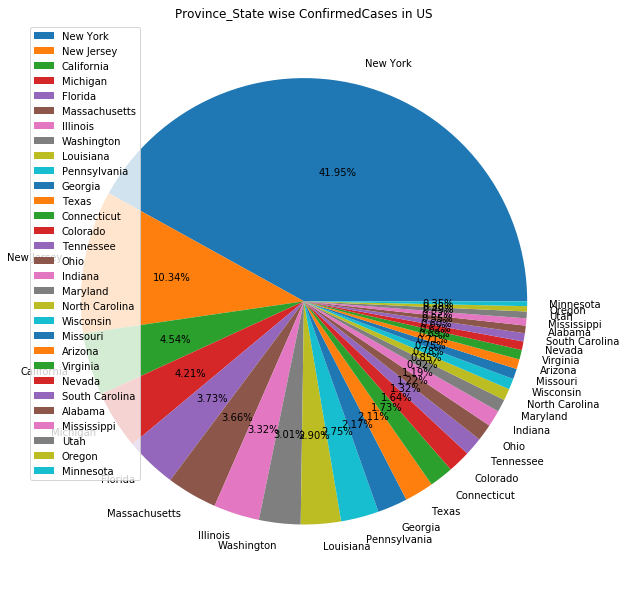

In [33]:
Confirmed_Fatalities = train_US.groupby('Province_State')[['ConfirmedCases','Fatalities']].max().reset_index()
plt.figure(figsize=(10,20))
plt.legend(train_US.Province_State,loc="center left")
plt.pie('ConfirmedCases',data=Confirmed_Fatalities[Confirmed_Fatalities['ConfirmedCases'] != 0].sort_values('ConfirmedCases',ascending=False).head(30),autopct='%1.2f%%',labels='Province_State')
plt.title("Province_State wise ConfirmedCases in US")
plt.legend(loc="best")
plt.show()

from the above graph we observed that the number of confirmed cases in New York is highest followed by New Jersy,California....

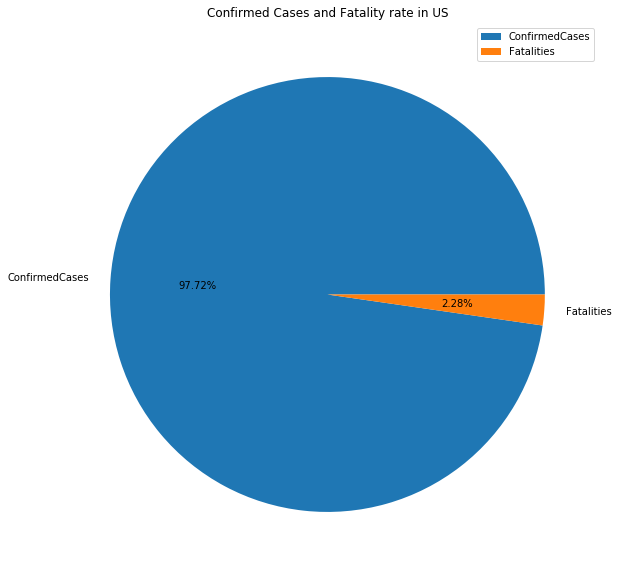

In [34]:
Total_Confirmed_Fatalities_US=train1_US.groupby(['Province_State']).agg({'ConfirmedCases':'max','Fatalities':'max'})
T_C_US=Total_Confirmed_Fatalities_US.iloc[0,0:2]
plt.figure(figsize=(10,10))
plt.pie(T_C_US,labels=["ConfirmedCases","Fatalities"],autopct='%1.2f%%')
plt.title("Confirmed Cases and Fatality rate in US")
plt.legend(loc="best")

From the above graph we observed that the fatality rate of US is 2.28%.

In [35]:
train = train.sort_values(['Country_Region','Province_State','Date'])
test = test.sort_values(['Country_Region','Province_State','Date'])
X_train=train.drop(columns=["Id", "ConfirmedCases", "Fatalities"])
X_train1=pd.get_dummies(X_train[['Province_State','Country_Region']])
Y_train_Con=train["ConfirmedCases"].values
Y_train_Fat=train["Fatalities"].values
X_test=test.drop(columns=["ForecastId"])
X_test1=pd.get_dummies(X_test[['Province_State','Country_Region']])

****LinearRegression

In [36]:
#split the dataset
x_train, x_test, y_train, y_test = train_test_split(X_train1, Y_train_Con, test_size=0.33, random_state=0)
#Create linear regression object
regr = LinearRegression()
#Train the model using the training sets
regr.fit(x_train,y_train)
#Predictions using the testing set
y_pred_C1=regr.predict(x_test)
#score
print('R Squared_Con: %.2f' % r2_score(y_test, y_pred_C1))
#rms = mean_squared_error(np.log(y_test).astype('int16'), np.log(y_pred).astype('int16'))
#print("Mean squared error: ", rms)
#prediction of confirmed cases
y_pred_Con1=regr.predict(X_test1)


R Squared_Con: 0.51


In [37]:
#split the dataset
x_train, x_test, y_train, y_test = train_test_split(X_train1, Y_train_Fat, test_size=0.33, random_state=0)
#Train the model using the training sets
regr.fit(x_train,y_train)
#Predictions using the testing set
y_pred_F1=regr.predict(x_test)
#Score
print('R Squared_Fat: %.2f' % r2_score(y_test, y_pred_F1))
#prediction of Fatalities
y_pred_Fat1=regr.predict(X_test1)

R Squared_Fat: 0.30


****DecisionTressRegressor

In [38]:
#splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(X_train1, Y_train_Con, test_size=0.33, random_state=0)
#create DecisionTressRegressor
DTR=DecisionTreeRegressor(splitter='best')
#train the model
DTR.fit(x_train,y_train)
#prediction using the testing set
y_pred_C2=DTR.predict(x_test)
print('R Squared_Con: %.2f' % r2_score(y_test,y_pred_C2))
y_pred_Con2=DTR.predict(X_test1)

R Squared_Con: 0.51


In [39]:
#split the dataset
x_train, x_test, y_train, y_test = train_test_split(X_train1, Y_train_Fat, test_size=0.33, random_state=0)
#Train the model using the training sets
regr.fit(x_train,y_train)
#Predictions using the testing set
y_pred_F2=regr.predict(x_test)
#Score
print('R Squared_Fat: %.2f' % r2_score(y_test, y_pred_F2))
#prediction of Fatalities
y_pred_Fat2=regr.predict(X_test1)

R Squared_Fat: 0.30


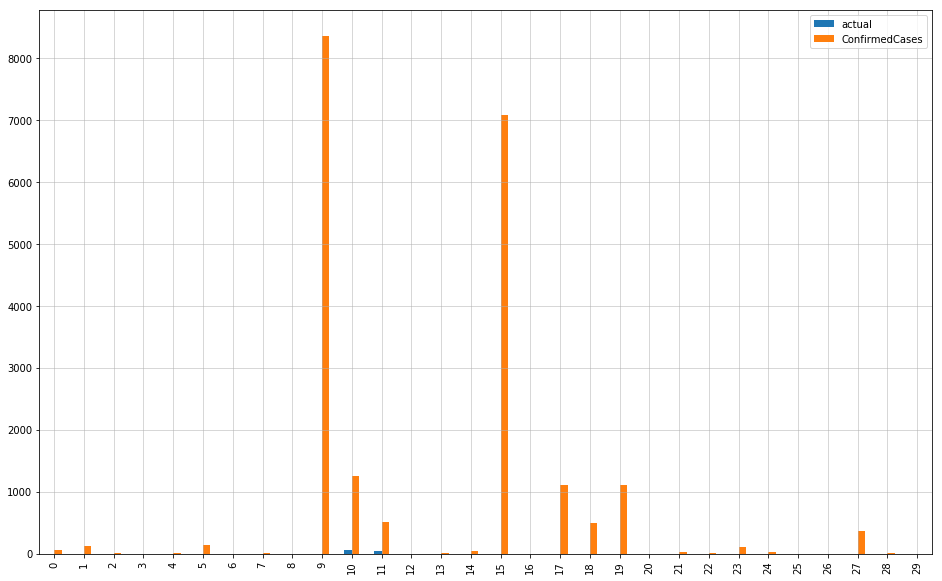

In [40]:
sub= pd.DataFrame({'actual': y_test,
        "ConfirmedCases": y_pred_C2})
df1=sub.head(30)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linewidth='0.5')
plt.grid(which='minor',linewidth='0.5')
plt.show()

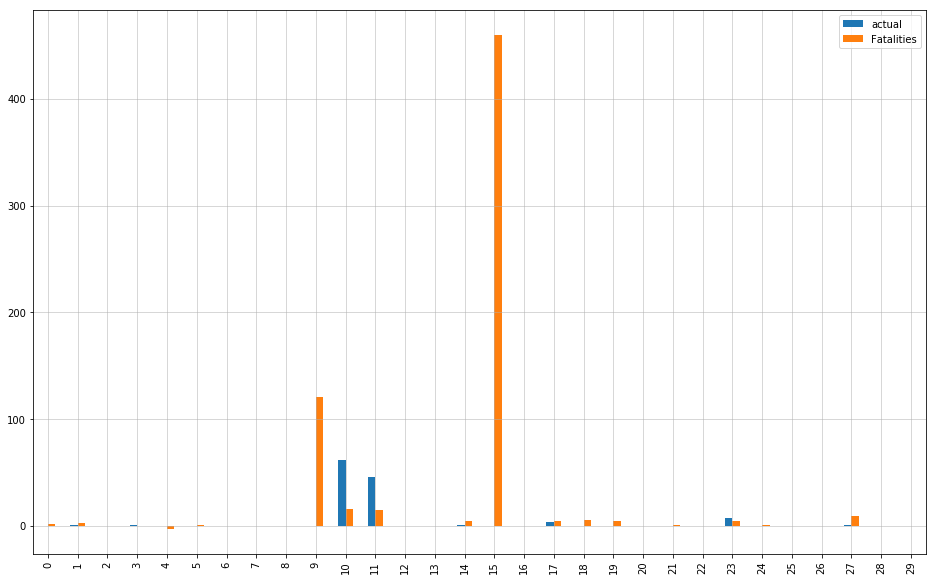

In [41]:
sub= pd.DataFrame({'actual': y_test,
        "Fatalities": y_pred_F2})
df1=sub.head(30)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linewidth='0.5')
plt.grid(which='minor',linewidth='0.5')
plt.show()

In [42]:
submission = pd.DataFrame({
        "ForecastId": test["ForecastId"],
        "ConfirmedCases": y_pred_Con2,
        "Fatalities":y_pred_Fat2
    })

submission.to_csv("submission.csv", index=False)
